In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("A_nw_25day.csv").drop("Unnamed: 0",axis=1)

In [3]:
df.shape

(1663, 2)

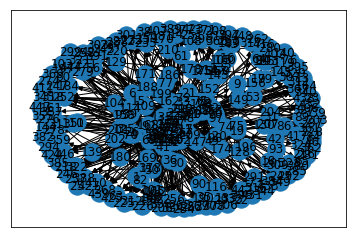

In [4]:
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
list_edge=df
list_edge.loc[0][0]
for i in range(858):
    G.add_edge(str(list_edge.loc[i][0]),str(list_edge.loc[i][1]))
nx.draw_networkx(G)
plt.show()

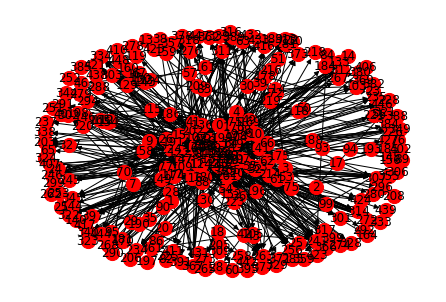

In [5]:
nx.draw_spring(G,node_size=200,node_color='red',with_labels=True)

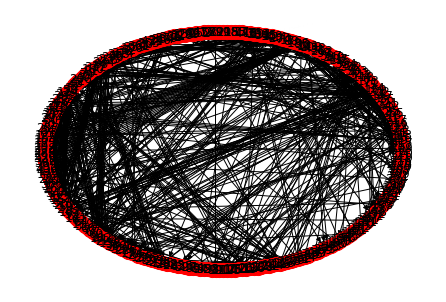

In [6]:
nx.draw_circular(G,node_size=200,node_color='red',with_labels=True)

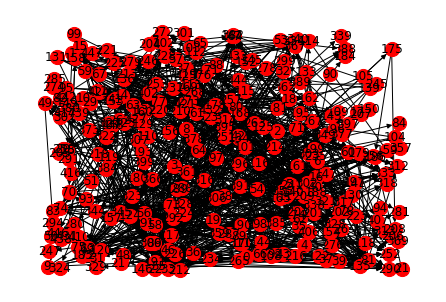

In [7]:
nx.draw_random(G,node_size=200,node_color='red',with_labels=True)

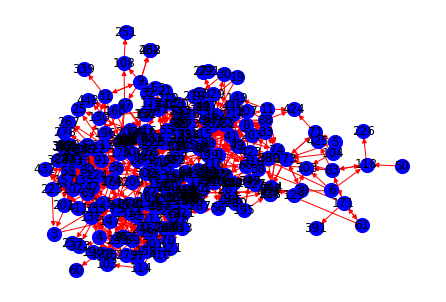

In [8]:
nx.draw_kamada_kawai(G,node_size=200,node_color='blue',edge_color='red',with_labels=True)

In [9]:
nx.number_of_edges(G)

858

In [10]:
nx.number_of_nodes(G)

292

In [11]:
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

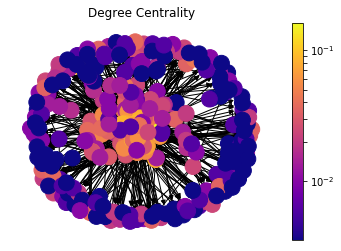

In [12]:
pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
#次数中心性

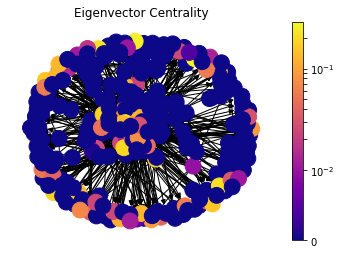

In [13]:
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
#固有ベクトル中心性

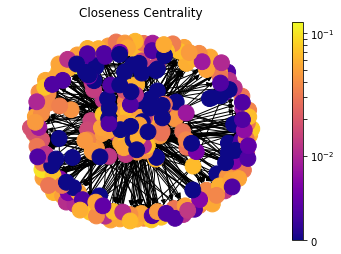

In [14]:
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
#近接中心性

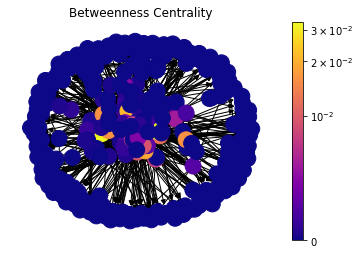

In [15]:
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
#媒介中心性

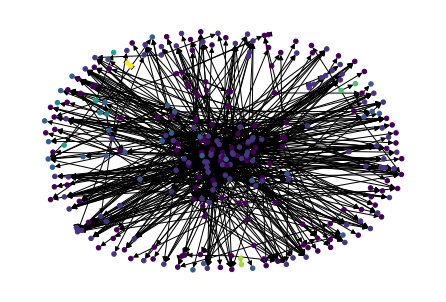

In [16]:
from networkx.algorithms import community
import pandas as pd 

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=20, with_labels=False)


In [17]:
#ネットワークデータの出力

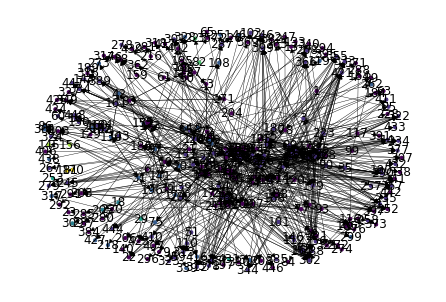

In [18]:
communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'],fontsize=1,width=0.4, node_size=10, with_labels=True) 
savefn = 'GA.pdf'
plt.savefig(savefn)

In [19]:
list_edge["0"]==2

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1633    False
1634    False
1635    False
1636    False
1637    False
1638    False
1639    False
1640    False
1641    False
1642    False
1643    False
1644    False
1645    False
1646    False
1647    False
1648    False
1649    False
1650    False
1651    False
1652    False
1653    False
1654    False
1655    False
1656    False
1657    False
1658    False
1659    False
1660    False
1661    False
1662    False
Name: 0, Length: 1663, dtype: bool